In [1]:
install.packages("hflights", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'hflights' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpmcDcXL\downloaded_packages


In [13]:
library("hflights") 

## 비행정보를 활용한 도수 분포표 만들기 

In [5]:
str(hflights)
head(hflights,3)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
5424,2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
5425,2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
5426,2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0


In [8]:
names(hflights)

[1] "Year"              "Month"             "DayofMonth"       
 [4] "DayOfWeek"         "DepTime"           "ArrTime"          
 [7] "UniqueCarrier"     "FlightNum"         "TailNum"          
[10] "ActualElapsedTime" "AirTime"           "ArrDelay"         
[13] "DepDelay"          "Origin"            "Dest"             
[16] "Distance"          "TaxiIn"            "TaxiOut"          
[19] "Cancelled"         "CancellationCode"  "Diverted"

### 도착 도시 별 Count

In [11]:
TableOfDest <- table(hflights$Dest)  #도착지 별 Count 
TableOfDest


 ABQ  AEX  AGS  AMA  ANC  ASE  ATL  AUS  AVL  BFL  BHM  BKG  BNA  BOS  BPT  BRO 
2812  724    1 1297  125  125 7886 5022  350  504 2736  110 3481 1752    3 1692 
 BTR  BWI  CAE  CHS  CID  CLE  CLT  CMH  COS  CRP  CRW  CVG  DAL  DAY  DCA  DEN 
1762 2551  561 1200  410 2140 4735 1348 1657 4813  357 1535 9820  451 2699 5920 
 DFW  DSM  DTW  ECP  EGE  ELP  EWR  FLL  GJT  GPT  GRK  GRR  GSO  GSP  GUC  HDN 
6653  647 2601  729  110 3036 4314 2462  403 1618   42  677  630 1123   86  110 
 HNL  HOB  HRL  HSV  IAD  ICT  IND  JAN  JAX  JFK  LAS  LAX  LBB  LCH  LEX  LFT 
 402  309 3983  923 1980 1517 1750 2011 2135  695 4082 6064 1333  364  584 2313 
 LGA  LIT  LRD  MAF  MCI  MCO  MDW  MEM  MFE  MIA  MKE  MLU  MOB  MSP  MSY  MTJ 
2730 1579 1188 2306 3174 3687 2094 2399 1128 2463 1588  292 1674 2010 6823  164 
 OAK  OKC  OMA  ONT  ORD  ORF  PBI  PDX  PHL  PHX  PIT  PNS  PSP  RDU  RIC  RNO 
 690 3170 2044  952 5748  717 1253 1235 2367 5096 1664 1539  106 1740  900  243 
 RSW  SAN  SAT  SAV  SDF  S

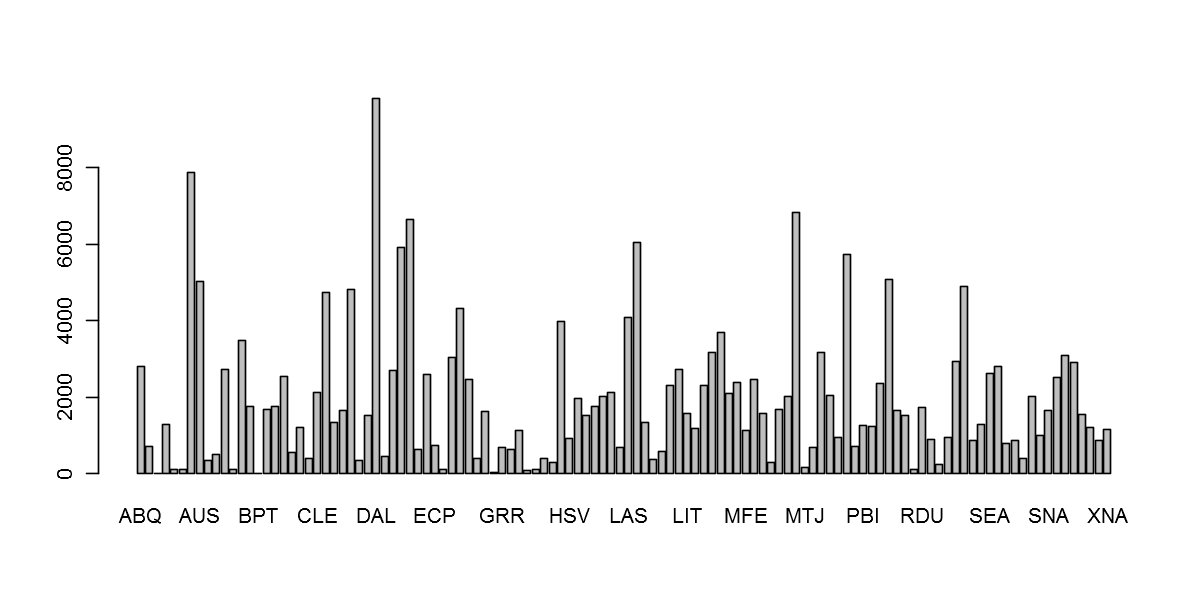

In [16]:
options(repr.plot.width=10, repr.plot.height=5)
barplot(TableOfDest)

In [20]:
print(length(TableOfDest))  # 116 개의 도시가 돈재.
print(range(TableOfDest))  # 1~9820 Cnt 범위.

[1] 116
[1]    1 9820


In [23]:
TableOfDest[TableOfDest > 6000] # 6000회 이상 도착한 곳.
TableOfDest[TableOfDest == max(TableOfDest)] # DAL 9820회.
TableOfDest[TableOfDest == min(TableOfDest)] # AGS 1회.


 ATL  DAL  DFW  LAX  MSY 
7886 9820 6653 6064 6823 

DAL 
9820

AGS 
  1

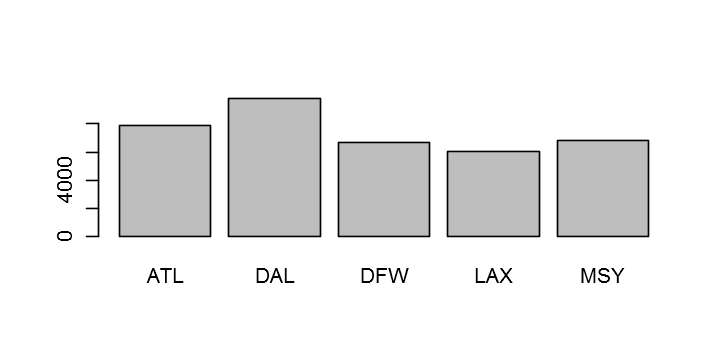

In [27]:
options(repr.plot.width=6, repr.plot.height=3)
Over6000 <- TableOfDest[TableOfDest > 6000]
barplot(Over6000[-6])

## Cancer Data [ 나이에 따른 환자수 ]

In [32]:
DF <- read.csv("../data/example_cancer.csv",stringsAsFactors = F)
head(DF,3)

,age,sex,height,weight,dateOfoperation,cancerStaging,hospitalization,diseaseCode
1,75,남,161,64,2011-06-22,I,48,C187
2,52,여,176.6,75.3,2011-05-19,IV,17,C187
3,67,여,154,65.6,2011-05-31,III,10,C187


In [12]:
str(DF)

'data.frame':	18310 obs. of  8 variables:
 $ age            : int  75 52 67 62 70 76 55 72 64 71 ...
 $ sex            : chr  "남" "여" "여" "남" ...
 $ height         : chr  "161" "176.6" "154" "162" ...
 $ weight         : chr  "64" "75.3" "65.6" "57" ...
 $ dateOfoperation: chr  "2011-06-22" "2011-05-19" "2011-05-31" "2011-06-21" ...
 $ cancerStaging  : chr  "I" "IV" "III" "I" ...
 $ hospitalization: int  48 17 10 11 10 10 12 18 15 35 ...
 $ diseaseCode    : chr  "C187" "C187" "C187" "C187" ...


In [29]:
options(repr.plot.width=4, repr.plot.height=3)
DegreeAge <- table(cut(DF$age,breaks = (1:11)*10))  # cut 을 통해 수치형 변수의 범위 지정. 
names(DegreeAge) <- c("10s","20s","30s","40s","50s","60s","70s","80s","90s","100s")
barplot(DegreeAge)

ERROR: Error in cut(DF$age, breaks = (1:11) * 10): 객체 'DF'를 찾을 수 없습니다


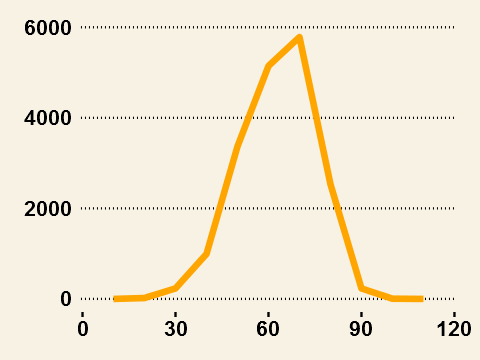

In [33]:
library("ggplot2")
library("ggthemes")
De <- ggplot(data=DF , aes(x=age))
De + geom_freqpoly(binwidth=10, size=1.4, colour="orange") + theme_wsj()

## 전국 커피숍 규모 파악

In [34]:
install.packages("data.table", repos = "http://cran.us.r-project.org")   #data.frame 과 비슷하지만 처리속도가 빨라 빅데이터에 많이 사용 된다.
library("data.table")
library("ggplot2")

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependency 'chron'



package 'chron' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpmcDcXL\downloaded_packages


In [36]:
DF <- fread("../data/example_coffee.csv", header = T,stringsAsFactors = T,data.table = F)  # read.csv 보다 빨리 데이터를 가지고온다.
head(DF,3)

Warning message:
In fread("data/example_coffee.csv", header = T, stringsAsFactors = T, : Bumped column 17 to type character on data row 11, field contains '기타'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses the first 5 rows, the middle 5 rows and the last 5 rows, so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.

,number,companyName,adress,adressBystreet,dateOflicensing,stateOfbusiness,dateOfclosure,startdateOfcessation,duedateOfcessation,dateOfreOpen,...,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
1,1,#11(Sharp eleven),서울특별시 양천구 목동 956번지 롯데캐슬위너 상가동 107호(한두3길 44),"서울특별시 양천구 목동중앙북로 38 (목동,롯데캐슬위너 상가동 107호(한두3길 44))",20080917,운영중,NA,NA,NA,NA,...,NA,2008,N,,20.8,NA,,휴게음식점,커피숍,NA
2,2,( 주)커피빈코리아청주지웰시티점,"충청북도 청주시 흥덕구 복대동 3379번지 신영지웰시티1차상업시설 124-1, 125, 126호(1층)","충청북도 청주시 흥덕구 대농로 17 (복대동,신영지웰시티1차상업시설 124-1, 125, 126호(1층))",20101124,운영중,NA,NA,NA,NA,...,NA,2010,N,,212.72,NA,,휴게음식점,커피숍,NA
3,3,(aA)더블에이,경상북도 경산시 사동 39번지 108-2호,"경상북도 경산시 백자로10길 3-11, 108-2호 (사동)",20130902,운영중,NA,NA,NA,NA,...,NA,2013,N,,20.04,NA,아파트지역,휴게음식점,커피숍,NA


In [39]:
str(DF)
class(DF)
DF <- subset(DF,select=c(-adress,-adressBystreet,-dateOfclosure,-startdateOfcessation,-duedateOfcessation,-dateOfreOpen,-zip))
names(DF)

'data.frame':	46832 obs. of  16 variables:
 $ number           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ companyName      : Factor w/ 36991 levels "#11(Sharp eleven)",..: 1 3 4 5 6 7 8 9 10 11 ...
 $ dateOflicensing  : int  20080917 20101124 20130902 20121108 20020911 20130822 20140605 20111209 20130315 20110908 ...
 $ stateOfbusiness  : Factor w/ 2 levels "운영중","폐업 등": 1 1 1 1 2 1 1 1 1 1 ...
 $ areaOfsite       : logi  NA NA NA NA NA NA ...
 $ waterwork        : Factor w/ 5 levels "","간이상수도",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ numOfmenWorker   : int  NA NA NA NA 0 NA NA NA NA NA ...
 $ yearOfStart      : int  2008 2010 2013 2012 2002 2013 2014 2011 2013 2011 ...
 $ multipleUse      : Factor w/ 3 levels "","N","Y": 2 2 2 2 2 2 2 2 2 2 ...
 $ grade            : Factor w/ 8 levels "","갑","관리",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sizeOfsite       : num  20.8 212.7 20 64.2 11.4 ...
 $ numOfwomenWorker : int  NA NA NA NA 0 NA NA NA NA NA ...
 $ vicintyOfsite    : Factor w/ 8 levels "","결혼예식장주변",..: 1 1 4 1 

[1] "data.frame"

ERROR: Error in eval(expr, envir, enclos): 객체 'adress'를 찾을 수 없습니다


In [41]:
range(DF$yearOfStart,na.rm = T)

[1] 1964 2015

In [43]:
subset(DF,subset = (yearOfStart == min(DF$yearOfStart,na.rm = T)))
unique(DF$stateOfbusiness)

,number,companyName,dateOflicensing,stateOfbusiness,areaOfsite,waterwork,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
23035,23035,엠에스커피,19641125,폐업 등,NA,상수도전용,0,1964,N,,0,0,기타,휴게음식점,커피숍,0
46290,46290,홀릭,19640929,폐업 등,NA,,0,1964,N,기타,0,0,기타,휴게음식점,커피숍,0


[1] 운영중  폐업 등
Levels: 운영중 폐업 등

### 현존하는 가장 오래된 커피샵

In [46]:
DFFilter <- subset(DF,subset = (stateOfbusiness=="운영중"))
range(DFFilter$yearOfStart,na.rm = T)
subset(DFFilter,subset = (yearOfStart == min(DFFilter$yearOfStart,na.rm = T)))

[1] 1967 2015

,number,companyName,dateOflicensing,stateOfbusiness,areaOfsite,waterwork,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
24108,24108,왕관 커피숍,19671013,운영중,NA,상수도전용,0,1967,N,갑,76.02,1,기타,휴게음식점,커피숍,1
44934,44934,학커피숍,19670414,운영중,NA,,0,1967,N,,59.13,0,,휴게음식점,커피숍,0


### 매년 개업하는 카페 수


1964 1966 1967 1968 1969 1970 1971 1972 1974 1975 1976 1979 1980 1981 1982 1983 
   2    2    3    1    2    4    6    3    1    2    5    4    9    8   12    9 
1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 
  11   18   21   21   26   23   25   28   37   50   48   48   41   54   54   46 
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
  89  183  398  799  648  654  863 1233 1579 2489 4172 5942 6315 7270 9905 3650 

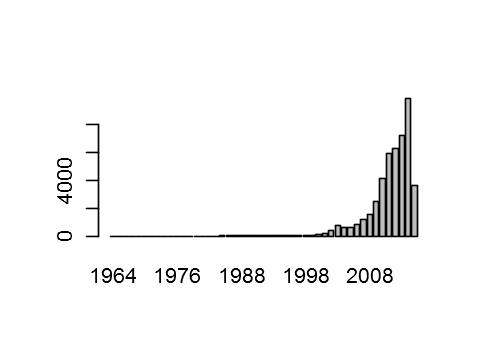

In [50]:
table(DF$yearOfStart)
barplot(table(DF$yearOfStart))

Warning message:
: `geom_bar()` no longer has a `binwidth` parameter. Please use `geom_histogram()` instead.Warning message:
: Removed 19 rows containing non-finite values (stat_bin).

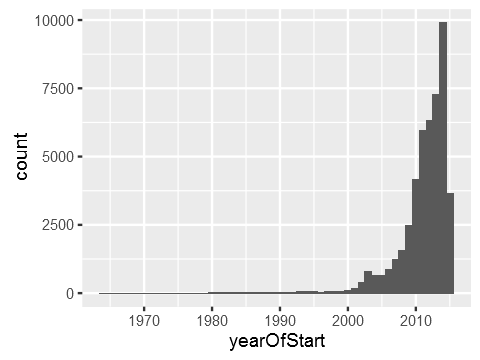

In [52]:
qplot(yearOfStart,data=DF,geom="bar",binwidth=1)

### 연도에 따른 영업상태 분할.

In [55]:
Freq <- table(DF$stateOfbusiness,DF$yearOfStart)
Freq

         
          1964 1966 1967 1968 1969 1970 1971 1972 1974 1975 1976 1979 1980 1981
  운영중     0    0    2    0    0    2    4    2    1    1    1    2    3    6
  폐업 등    2    2    1    1    2    2    2    1    0    1    4    2    6    2
         
          1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
  운영중     2    3    4    5    5    6   11    5    7    7    3   14   14   13
  폐업 등   10    6    7   13   16   15   15   18   18   21   34   36   34   35
         
          1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
  운영중    14   21   25   23   26   76  105  163  180  204  314  496  729 1229
  폐업 등   27   33   29   23   63  107  293  636  468  450  549  737  850 1260
         
          2010 2011 2012 2013 2014 2015
  운영중  2503 3961 4642 6045 9125 3564
  폐업 등 1669 1981 1673 1225  780   86

In [57]:
Freq <- Freq[,which(colnames(Freq) >= "1997")]
PFreq <- prop.table(Freq,margin = 2)    # 열 별로 prop.table Margin 1 은 행별로. 
PFreq

         
                1997       1998       1999       2000       2001       2002
  운영중  0.38888889 0.46296296 0.50000000 0.29213483 0.41530055 0.26381910
  폐업 등 0.61111111 0.53703704 0.50000000 0.70786517 0.58469945 0.73618090
         
                2003       2004       2005       2006       2007       2008
  운영중  0.20400501 0.27777778 0.31192661 0.36384705 0.40227088 0.46168461
  폐업 등 0.79599499 0.72222222 0.68807339 0.63615295 0.59772912 0.53831539
         
                2009       2010       2011       2012       2013       2014
  운영중  0.49377260 0.59995206 0.66661057 0.73507522 0.83149931 0.92125189
  폐업 등 0.50622740 0.40004794 0.33338943 0.26492478 0.16850069 0.07874811
         
                2015
  운영중  0.97643836
  폐업 등 0.02356164

In [59]:
PFreq2 <- prop.table(Freq,margin = 1)
PFreq2

         
                  1997         1998         1999         2000         2001
  운영중  0.0006281595 0.0007478089 0.0006879842 0.0007777213 0.0022733391
  폐업 등 0.0025557621 0.0022459727 0.0017812887 0.0048791822 0.0082868649
         
                  2002         2003         2004         2005         2006
  운영중  0.0031407975 0.0048757142 0.0053842242 0.0061021208 0.0093924800
  폐업 등 0.0226920694 0.0492565056 0.0362453532 0.0348513011 0.0425185874
         
                  2007         2008         2009         2010         2011
  운영중  0.0148365290 0.0218061081 0.0367622865 0.0748706291 0.1184828453
  폐업 등 0.0570786865 0.0658302354 0.0975836431 0.1292596035 0.1534231722
         
                  2012         2013         2014         2015
  운영중  0.1388531602 0.1808201968 0.2729502558 0.1066076396
  폐업 등 0.1295693928 0.0948729864 0.0604089219 0.0066604709

In [64]:
NewDF <- data.frame(colnames(Freq),Freq[1,],Freq[2,],PFreq[1,],PFreq[2,])
rownames(NewDF) <- NULL
colnames(NewDF) <- c("Time","Open","Close","POpen","PClose")
NewDF <- NewDF[-19,] # 2015년은 데이터 부족으로 제외 
NewDF

,Time,Open,Close,POpen,PClose
1,1997,21,33,0.388888888888889,0.611111111111111
2,1998,25,29,0.462962962962963,0.537037037037037
3,1999,23,23,0.5,0.5
4,2000,26,63,0.292134831460674,0.707865168539326
5,2001,76,107,0.415300546448087,0.584699453551913
6,2002,105,293,0.263819095477387,0.736180904522613
7,2003,163,636,0.204005006257822,0.795994993742178
8,2004,180,468,0.277777777777778,0.722222222222222
9,2005,204,450,0.311926605504587,0.688073394495413
10,2006,314,549,0.363847045191193,0.636152954808807


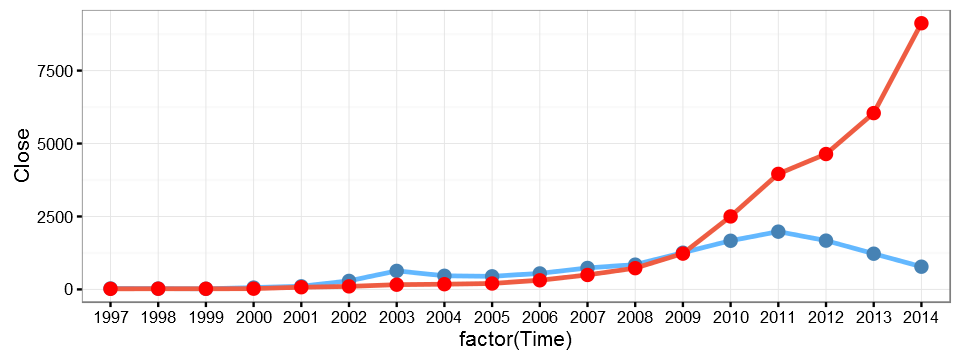

In [67]:
options(repr.plot.width=8, repr.plot.height=3)
GP <- ggplot(NewDF, aes(x=factor(Time),y=Close,group = 1))
GP + geom_line(colour="steelblue1", size=1) + geom_point(colour="steelblue",size=3) + geom_line(aes(y=Open), colour="tomato2",size=1) + geom_point(aes(y=Open), colour = "red", size = 3) + theme_bw()

### 커피숍 규모파악

In [69]:
Size <- DF$sizeOfsite
summary(Size)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    0.00    28.12    50.00    75.53    93.75 24080.00       19 

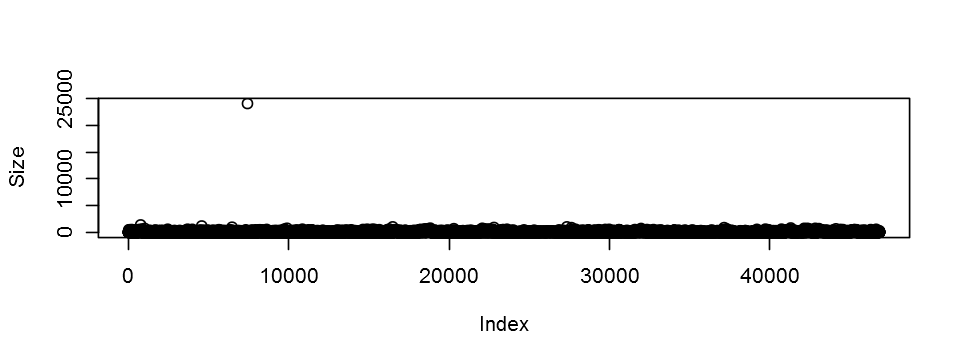

In [71]:
plot(Size) # 10000 이상의 특이한 점 발견.

In [73]:
#아웃라이어 ( 특이점 ) 제거 )

Size[Size > 10000] <-  NA
summary(Size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   28.12   50.00   75.02   93.75 1406.00      20 

In [75]:
Size[Size==0] <- NA
Size <- Size[complete.cases(Size)]
summary(Size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.25   30.00   51.92   77.23   95.30 1406.00 

Warning message:
: Removed 1060 rows containing non-finite values (stat_bin).Warning message:
: Removed 2 rows containing missing values (geom_path).

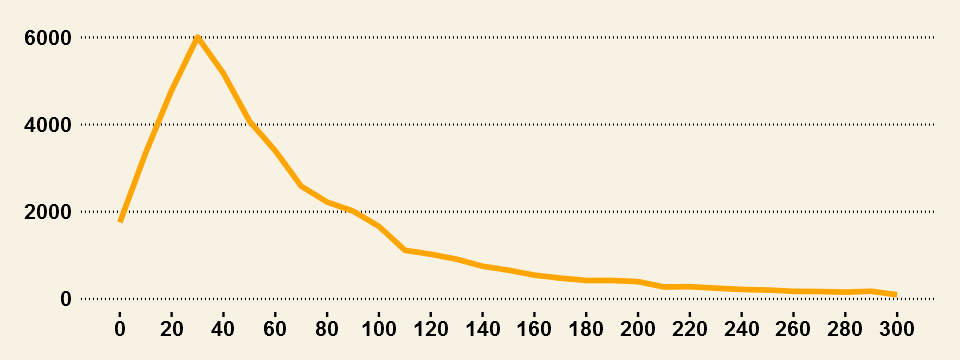

In [81]:
DegreeOfSize <- table(cut(Size,breaks=c(0:72)*20))  # 20단위로 계급생성.
GE <- ggplot(data=DF,aes(x=sizeOfsite))
GE + geom_freqpoly(binwidth=10, size=1.2, colour="orange") + scale_x_continuous(limits = c(0,300), breaks=seq(0,300,20)) + theme_wsj()

### 전국 인구조사 자료정리 ( 전처리 )

In [102]:
DF <- read.csv("../data/example_population.csv",stringsAsFactors = F)
str(DF)
head(DF,3)

'data.frame':	281 obs. of  7 variables:
 $ City      : chr  "서울특별시  (1100000000)" "서울특별시 종로구 (1111000000)" "서울특별시 중구 (1114000000)" "서울특별시 용산구 (1117000000)" ...
 $ Population: chr  "10,078,850" "155,695" "126,817" "235,186" ...
 $ Households: chr  "4,197,478" "72,882" "59,614" "108,138" ...
 $ PersInHou : num  2.4 2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 ...
 $ Male      : chr  "4,962,774" "76,962" "63,292" "114,119" ...
 $ Female    : chr  "5,116,076" "78,733" "63,525" "121,067" ...
 $ SexRatio  : num  0.97 0.98 1 0.94 0.99 0.97 1.01 1 0.96 0.97 ...


,City,Population,Households,PersInHou,Male,Female,SexRatio
1,서울특별시 (1100000000),"10,078,850","4,197,478",2.4,"4,962,774","5,116,076",0.97
2,서울특별시 종로구 (1111000000),"155,695","72,882",2.14,"76,962","78,733",0.98
3,서울특별시 중구 (1114000000),"126,817","59,614",2.13,"63,292","63,525",1


In [86]:
install.packages("stringr", repos = "http://cran.us.r-project.org")
library("stringr")

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
: package 'stringr' is in use and will not be installed

In [103]:
#str_split_fixed(문자열, 분할 기준문자,분리할 개수)
temp <- str_split_fixed(DF[,1],"\\(",2)
NewCity <- str_split_fixed(temp[,1]," ",2)
head(NewCity,3)

서울특별시,
서울특별시,종로구
서울특별시,중구


In [104]:
colnames(NewCity) <- c("Provinces","city")
head(NewCity,3)

Provinces,city
서울특별시,
서울특별시,종로구
서울특별시,중구


In [105]:
DF <- data.frame(NewCity,DF[,c(2:7)])
DF[DF==" "] <- NA
DF <- DF[complete.cases(DF),]
head(DF,10)

,Provinces,city,Population,Households,PersInHou,Male,Female,SexRatio
2,서울특별시,종로구,"155,695","72,882",2.14,"76,962","78,733",0.98
3,서울특별시,중구,"126,817","59,614",2.13,"63,292","63,525",1
4,서울특별시,용산구,"235,186","108,138",2.17,"114,119","121,067",0.94
5,서울특별시,성동구,"298,145","126,915",2.35,"148,265","149,880",0.99
6,서울특별시,광진구,"362,197","158,769",2.28,"177,946","184,251",0.97
7,서울특별시,동대문구,"362,604","160,110",2.26,"181,825","180,779",1.01
8,서울특별시,중랑구,"417,976","177,077",2.36,"208,657","209,319",1
9,서울특별시,성북구,"464,176","192,670",2.41,"227,676","236,500",0.96
10,서울특별시,강북구,"333,523","141,325",2.36,"164,304","169,219",0.97
11,서울특별시,도봉구,"353,284","137,260",2.57,"174,075","179,209",0.97


In [115]:
for(i in 3:8){
  DF[,i] <- sapply(DF[,i], function(x) gsub(",","",x)) # , 제거 
  DF[,i] <- as.character(DF[,i]) # 문자 변환 
  DF[,i] <- as.numeric(DF[,i]) # 숫자로 다시 변환.
}
head(DF,10)

,Provinces,city,Population,Households,PersInHou,Male,Female,SexRatio
2,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
3,서울특별시,중구,126817,59614,2.13,63292,63525,1
4,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
5,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
6,서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
7,서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01
8,서울특별시,중랑구,417976,177077,2.36,208657,209319,1
9,서울특별시,성북구,464176,192670,2.41,227676,236500,0.96
10,서울특별시,강북구,333523,141325,2.36,164304,169219,0.97
11,서울특별시,도봉구,353284,137260,2.57,174075,179209,0.97


In [107]:
str(DF)

'data.frame':	263 obs. of  8 variables:
 $ Provinces : Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ city      : Factor w/ 241 levels " ","가평군 ",..: 188 189 158 105 32 65 190 106 6 63 ...
 $ Population: chr  "155,695" "126,817" "235,186" "298,145" ...
 $ Households: chr  "72,882" "59,614" "108,138" "126,915" ...
 $ PersInHou : num  2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 2.57 ...
 $ Male      : chr  "76,962" "63,292" "114,119" "148,265" ...
 $ Female    : chr  "78,733" "63,525" "121,067" "149,880" ...
 $ SexRatio  : num  0.98 1 0.94 0.99 0.97 1.01 1 0.96 0.97 0.97 ...


In [109]:
ProPopul <- tapply(DF$Population, DF$Provinces, sum)

ERROR: Error in FUN(X[[i]], ...): 인자의 'type' (character)이 올바르지 않습니다


In [116]:
DF[,1] <- factor(DF[,1])
str(DF)

'data.frame':	263 obs. of  8 variables:
 $ Provinces : Factor w/ 16 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ city      : Factor w/ 241 levels " ","가평군 ",..: 188 189 158 105 32 65 190 106 6 63 ...
 $ Population: num  155695 126817 235186 298145 362197 ...
 $ Households: num  72882 59614 108138 126915 158769 ...
 $ PersInHou : num  2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 2.57 ...
 $ Male      : num  76962 63292 114119 148265 177946 ...
 $ Female    : num  78733 63525 121067 149880 184251 ...
 $ SexRatio  : num  0.98 1 0.94 0.99 0.97 1.01 1 0.96 0.97 0.97 ...


In [119]:
ProPopul <- tapply(DF$Population, DF$Provinces, sum)
ProPopul

강원도         경기도       경상남도       경상북도     광주광역시 
       1547166       18723822        4428762        3215695        1476974 
    대구광역시     대전광역시     부산광역시     서울특별시     울산광역시 
       2491137        1525656        3517491       10078850        1169768 
    인천광역시       전라남도       전라북도 제주특별자치도       충청남도 
       2914271        1902638        2523806         615250        2671383 
      충청북도 
       2414568

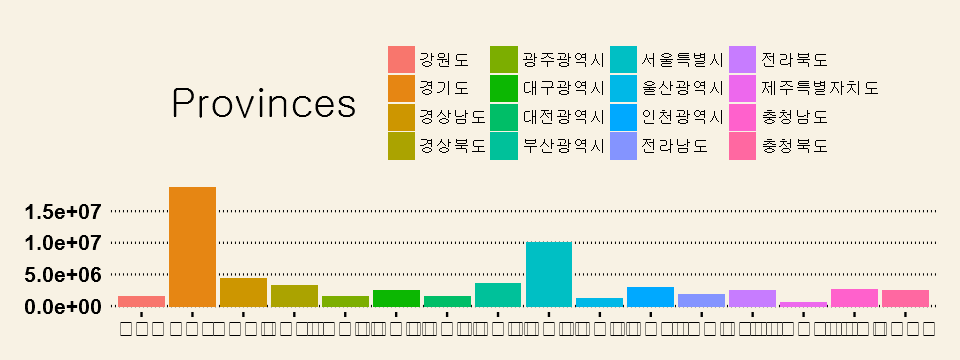

In [120]:
Graph <- ggplot(DF,aes(x=Provinces,y=Population, fill=Provinces))
Graph + geom_bar(stat="identity") + theme_wsj()